
# Analyse des Correspondances Multiples


Celui-ci est extrait du site de Ricco Rakotomalala (Université Lyon 2) :<br />

[données concernant les races canines](http://eric.univ-lyon2.fr/ricco/tanagra/fichiers/races_canines_acm.xls) 


<br />


</p>
<p>
Nous partons d'un fichier texte intitulé "mca_data.txt".<br />
On importe la librairie pandas pour charger les données, ainsi que la classe MCA du package <i>fanalysis</i>.<br />
Les données sont transformées en matrice de type numpy.ndarray.
</p>
<p>Dans la matrice de données X, les catégories peuvent être codées :
<ul>
    <li>soit par des entiers</li>
    <li>soit par des chaines de caractères</li>
</ul>
</p>
<p>Dans cet exemple, les catégories sont codées par des chaines de caractère.</p>

In [223]:
import pandas as pd
from fanalysis.mca import MCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [254]:
df = pd.read_csv("data/races_canines_acm.csv", header=0, index_col=0, delimiter="\t", encoding="utf-8")

In [225]:
df.head()

,Taille,Poids,Velocite,Intelligence,Affection,Agressivite,Fonction
Chien,,,,,,,
Beauceron,Taille++,Poids+,Veloc++,Intell+,Affec+,Agress+,utilite
Basset,Taille-,Poids-,Veloc-,Intell-,Affec-,Agress+,chasse
Berger All,Taille++,Poids+,Veloc++,Intell++,Affec+,Agress+,utilite
Boxer,Taille+,Poids+,Veloc+,Intell+,Affec+,Agress+,compagnie
Bull-Dog,Taille-,Poids-,Veloc-,Intell+,Affec+,Agress-,compagnie


### Créer le tableau disjontif complet

In [271]:
### Les données complètes, les premières six variables
# selo le tutoriel de fanalysis

DActives = df.iloc[:, 0:6]
# Multiplier par 1 permet de transformer false/true en 0,1
X = pd.get_dummies(DActives,  prefix='',prefix_sep='', ) * 1
X.head()

,Taille+,Taille++,Taille-,Poids+,Poids++,Poids-,Veloc+,Veloc++,Veloc-,Intell+,Intell++,Intell-,Affec+,Affec-,Agress+,Agress-
Chien,,,,,,,,,,,,,,,,
Beauceron,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0
Basset,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0
Berger All,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0
Boxer,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
Bull-Dog,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1


In [272]:
### Le même tableau que dans le manuel Rakotomalala
DActives = df.iloc[[0,1,2,3,4,5,6, 18], [0,2,4]]
# Multiplier par 1 permet de transformer false/true en 0,1
X = pd.get_dummies(DActives,  prefix='',prefix_sep='', ) * 1
X

,Taille+,Taille++,Taille-,Veloc+,Veloc++,Veloc-,Affec+,Affec-
Chien,,,,,,,,
Beauceron,0,1,0,0,1,0,1,0
Basset,0,0,1,0,0,1,0,1
Berger All,0,1,0,0,1,0,1,0
Boxer,1,0,0,1,0,0,1,0
Bull-Dog,0,0,1,0,0,1,1,0
Bull-Mastif,0,1,0,0,0,1,0,1
Caniche,0,0,1,1,0,0,1,0
Labrador,1,0,0,1,0,0,1,0


In [256]:
Xm = X.copy(deep=True)
#Total sum per row: 
Xm.loc[:,'Total'] = Xm.sum(axis=1)
#Total sum per column: 
Xm.loc['Total',:] = Xm.sum(axis=0)
Xm.tail()

,Taille+,Taille++,Taille-,Veloc+,Veloc++,Veloc-,Affec+,Affec-,Total
Chien,,,,,,,,,
Bull-Dog,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0
Bull-Mastif,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
Caniche,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0
Labrador,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0
Total,2.0,3.0,3.0,3.0,2.0,3.0,6.0,2.0,24.0


In [257]:
ddf_frq = np.round(Xm/Xm.iloc[-1,-1],3)
ddf_frq

,Taille+,Taille++,Taille-,Veloc+,Veloc++,Veloc-,Affec+,Affec-,Total
Chien,,,,,,,,,
Beauceron,0.000,0.042,0.000,0.000,0.042,0.000,0.042,0.000,0.125
Basset,0.000,0.000,0.042,0.000,0.000,0.042,0.000,0.042,0.125
Berger All,0.000,0.042,0.000,0.000,0.042,0.000,0.042,0.000,0.125
Boxer,0.042,0.000,0.000,0.042,0.000,0.000,0.042,0.000,0.125
Bull-Dog,0.000,0.000,0.042,0.000,0.000,0.042,0.042,0.000,0.125
Bull-Mastif,0.000,0.042,0.000,0.000,0.000,0.042,0.000,0.042,0.125
Caniche,0.000,0.000,0.042,0.042,0.000,0.000,0.042,0.000,0.125
Labrador,0.042,0.000,0.000,0.042,0.000,0.000,0.042,0.000,0.125
Total,0.083,0.125,0.125,0.125,0.083,0.125,0.250,0.083,1.000


In [259]:
#Profil individu moyen
ind_moy = np.sum(X.values,axis=0)/(n*p)
print(ind_moy)

[0.08333333 0.125      0.125      0.125      0.08333333 0.125
 0.25       0.08333333]


In [260]:
#récupération des infos - nombre de variables
p = DActives.shape[1]
#nombre d'observations
n = DActives.shape[0]
print(p,n)

3 8


In [261]:
### Nombre global de modalités, toute variable confondue
M = X.shape[1]
M

8

In [262]:
#nombre max de facteurs
Hmax = M-p
Hmax

5

In [263]:
#distance du KHI-2 entre beauceron (n°0) et basset (n°1)
print(round(np.sum(1/ind_moy*(X.values[0,:]/p-X.values[1,:]/p)**2), 4))
#idem entre basset(n°1) et caniche(n°6)

bc = np.sum(1/ind_moy*(X.values[1,:]/p-X.values[6,:]/p)**2)
print(round(bc, 4))
      

5.7778
3.5556


In [264]:
#distance à l'origine du basset (index 1)
print(round(np.sum(1/ind_moy*(X.values[1,:]/p-ind_moy)**2),4))

#distance à l'origine du basset (index 2)
print(round(np.sum(1/ind_moy*(X.values[2,:]/p-ind_moy)**2),4))

#distance à l'origine du caniche (index 6)
print(round(np.sum(1/ind_moy*(X.values[6,:]/p-ind_moy)**2),4))

2.1111
1.6667
1.2222


In [265]:
print(np.sum(1/ind_moy*(X.values[:]/p-ind_moy)**2, axis=1))

[1.66666667 2.11111111 1.66666667 1.66666667 1.22222222 2.11111111
 1.22222222 1.66666667]


In [273]:
### Ajouter une colonne avec la distance de l'individu moyen
# pour chaque individu: les individus plus éloignés sont plus rares
X['dist_org'] = X.apply(lambda x: round(np.sum(1/ind_moy*(x/p-ind_moy)**2),4), raw=True, axis=1)
X['dist_org']

Chien
Beauceron      1.6667
Basset         2.1111
Berger All     1.6667
Boxer          1.6667
Bull-Dog       1.2222
Bull-Mastif    2.1111
Caniche        1.2222
Labrador       1.6667
Name: dist_org, dtype: float64

count    8.000000
mean     1.666675
std      0.335973
min      1.222200
25%      1.555575
50%      1.666700
75%      1.777800
max      2.111100
Name: dist_org, dtype: float64


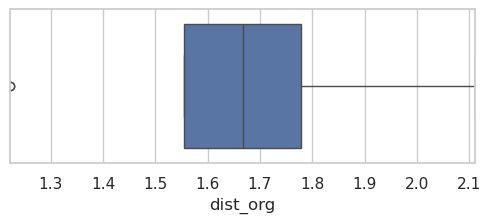

In [275]:

sns.set_theme(style="whitegrid",rc={"figure.figsize":(6,2)} )


a = X['dist_org']

print(a.describe())

ax = sns.boxplot(x=a)

### Noter que au delà des limites les valeurs sont coupées car postulées
ax.set_xlim(left=min(a), right=max(a))

plt.show()

In [283]:
X   #.iloc[:,:-1]

,Taille+,Taille++,Taille-,Veloc+,Veloc++,Veloc-,Affec+,Affec-,dist_org
Chien,,,,,,,,,
Beauceron,0,1,0,0,1,0,1,0,1.6667
Basset,0,0,1,0,0,1,0,1,2.1111
Berger All,0,1,0,0,1,0,1,0,1.6667
Boxer,1,0,0,1,0,0,1,0,1.6667
Bull-Dog,0,0,1,0,0,1,1,0,1.2222
Bull-Mastif,0,1,0,0,0,1,0,1,2.1111
Caniche,0,0,1,1,0,0,1,0,1.2222
Labrador,1,0,0,1,0,0,1,0,1.6667


In [277]:
#distance à l'origine des individus (obs.)
disto_ind = np.apply_along_axis(arr=X.iloc[:,:-1].values,axis=1,func1d=lambda x:np.sum(1
/ind_moy*(x/p-ind_moy)**2))
#poids des obs.
poids_ind = np.ones(X.shape[0])/n
#inertie
inertie_ind = poids_ind*disto_ind
#afffichage
print(pd.DataFrame(np.transpose([poids_ind,disto_ind,inertie_ind]),
                   index=X.index, columns=['poind_ind', 'dist_in', 'inertie_ind']))
#inerrie totale
inertie_tot_ind = np.sum(inertie_ind)
print('\nInertie totale:', round(inertie_tot_ind,3))

             poind_ind   dist_in  inertie_ind
Chien                                        
Beauceron        0.125  1.666667     0.208333
Basset           0.125  2.111111     0.263889
Berger All       0.125  1.666667     0.208333
Boxer            0.125  1.666667     0.208333
Bull-Dog         0.125  1.222222     0.152778
Bull-Mastif      0.125  2.111111     0.263889
Caniche          0.125  1.222222     0.152778
Labrador         0.125  1.666667     0.208333

Inertie totale: 1.667


In [278]:
### Profil moyen colonnes
moda_moy = np.ones(X.shape[0])/n
moda_moy


array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [285]:
#enelver la colonne 'dist-org'
df = X.iloc[:,:-1]
#somme en colonne
somme_col = np.sum(df.values,axis=0)
print(somme_col)
#poids des variables_modalités (points modalités)
poids_moda = somme_col/(n*p)
#distance à l'origine des points modalités
disto_moda = np.apply_along_axis(arr=df.values/somme_col,axis=0,func1d=lambda x:
np.sum(n*(x-moda_moy)**2))
#np
inertie_moda = poids_moda * disto_moda
#affichage
print(pd.DataFrame(np.transpose([poids_moda,disto_moda,inertie_moda]),index
=df.columns,columns=['Poids','Disto','Inertie']))

[2 3 3 3 2 3 6 2]
             Poids     Disto   Inertie
Taille+   0.083333  3.000000  0.250000
Taille++  0.125000  1.666667  0.208333
Taille-   0.125000  1.666667  0.208333
Veloc+    0.125000  1.666667  0.208333
Veloc++   0.083333  3.000000  0.250000
Veloc-    0.125000  1.666667  0.208333
Affec+    0.250000  0.333333  0.083333
Affec-    0.083333  3.000000  0.250000


## Analyse factorielle

<p>On crée une instance de la classe MCA, en lui passant ici des étiquettes pour les lignes et les variables. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.</p>

In [294]:
acm = MCA(row_labels=DActives.index.values, var_labels=DActives.columns.values)

On estime le modèle en appliquant la méthode <i>fit</i> de la classe MCA sur le jeu de données.

In [295]:
acm.fit(DActives.values)

MCA(row_labels=array(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog',
       'Bull-Mastif', 'Caniche', 'Labrador'], dtype=object),
    var_labels=array(['Taille', 'Velocite', 'Affection'], dtype=object))

<h3>I.1. Analyse des valeurs propres</h3>

L'attribut <i>my\_mca.eig\_</i> contient :
<ul>
    <li>en 1ère ligne : les valeurs propres en valeur absolue</li>
    <li>en 2ème ligne : les valeurs propres en pourcentage de la variance totale</li>
    <li>en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale</li>

</ul>

In [296]:
print(acm.eig_)

[[7.08031258e-01 5.91489364e-01 2.61991819e-01 6.97465196e-02
  3.54077063e-02]
 [4.24818755e+01 3.54893618e+01 1.57195091e+01 4.18479118e+00
  2.12446238e+00]
 [4.24818755e+01 7.79712373e+01 9.36907464e+01 9.78755376e+01
  1.00000000e+02]]


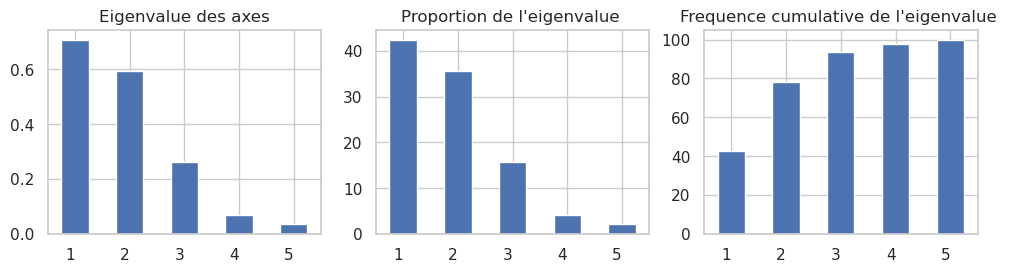

In [297]:
eig = pd.DataFrame(my_mca.eig_)

r1 = eig.iloc[0]
r2 = eig.iloc[1]
r3 = eig.iloc[2]
s=list(range(1,len(r1)+1))
r1.index=s
r2.index=s
r3.index=s

# https://www.statology.org/pandas-subplots/
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

r1.plot(kind='bar', ax=axes[0], title='Eigenvalue des axes')
r2.plot(kind='bar', ax=axes[1], title="Proportion de l'eigenvalue ")
r3.plot(kind='bar', ax=axes[2], title="Frequence cumulative de l'eigenvalue ")
# Met les valeurs xticks en vertical
fig.autofmt_xdate(rotation=0)
plt.show()

### Estimer le nombre de facteur à retenir

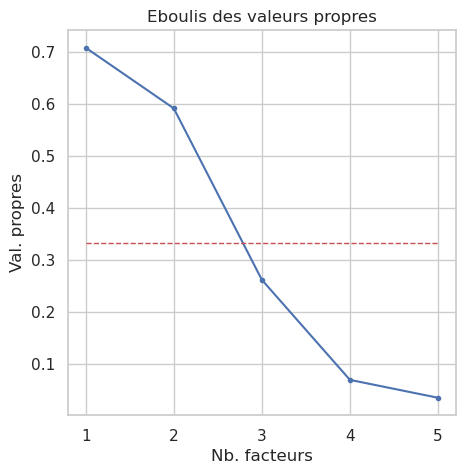

In [298]:
###  éboulis des v.p. selon la règle de Kaiser
# cf. Rakotomalala, pratique p.311 
fix,ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,Hmax+1),acm.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#seuil - Règle de Kaiser
ax.plot([1,Hmax],[1/p,1/p],"r--",linewidth=1)
plt.show()

*Diagramme d'éboulis*. Représentation graphique ayant pour but d'identifier un point d'inflexion dans une courbe de la variance. Le nom donné à ce type de graphique vient de la ressemblance de la courbe avec le profil des éboulis (scree) au bas d'une falaise. [DataFranca, Diagramme d'éboulis, 2024](https://datafranca.org/wiki/index.php?title=Diagramme_d%27%C3%A9boulis&oldid=93502)

In [304]:
acm.eig_[0]

array([0.70803126, 0.59148936, 0.26199182, 0.06974652, 0.03540771])

In [303]:
### Correction de Benzecri, cf. Rakotomalala, Pratique, p.313sqq

#somme en colonne
#récupérer les valeurs propres supérieur à (1/p)
lambada = acm.eig_[0][acm.eig_[0]>1/p]
print(lambada)

#appliquer la correction
lambada_prim = ((p/(p-1))*(lambada-1/p))**2
print(lambada_prim)

#faire la somme
S_prim = np.sum(lambada_prim)
print(S_prim)

#et produire les pourcentages
percent_prim = lambada_prim/S_prim*100

#affichage
print(pd.DataFrame(np.transpose(np.array([lambada_prim,percent_prim,
                                np.cumsum(percent_prim)])),columns=['Val.P','%','Cumul %'],index=range(1,3)))

[0.70803126 0.59148936]
[0.3158967  0.14995021]
0.46584690981683075
      Val.P          %     Cumul %
1  0.315897  67.811269   67.811269
2  0.149950  32.188731  100.000000


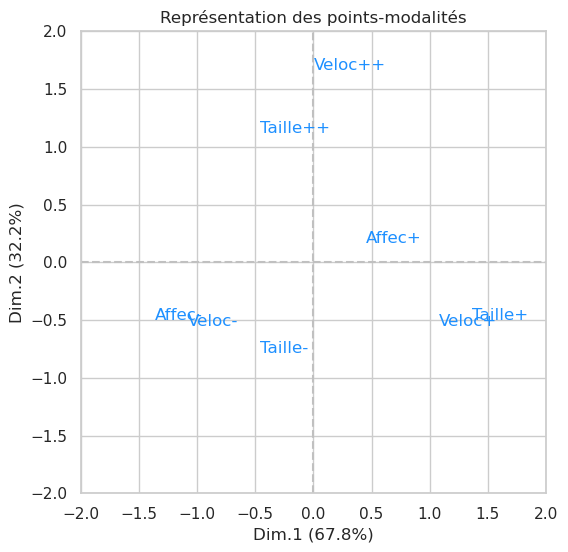

In [308]:
fix,ax = plt.subplots(figsize=(6,6))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (67.8%)")
ax.set_ylabel("Dim.2 (32.2%)")
plt.title("Représentation des points-modalités")
for i in range(df.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
plt.show()

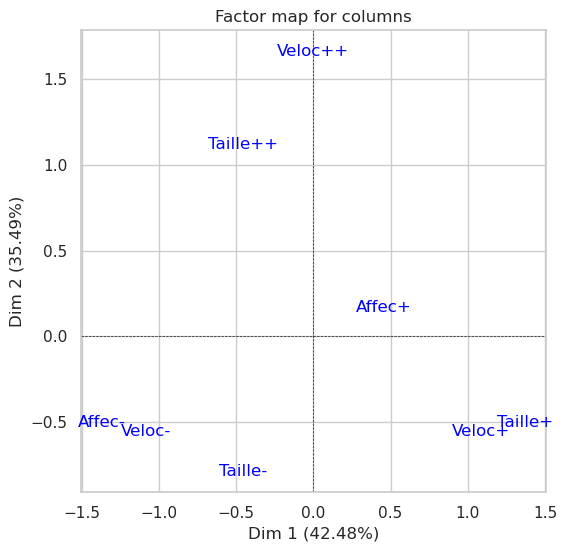

In [377]:
# Mapping des points colonnes, 
# graphique par défaut de la librairie fanalysis
acm.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(6,6))

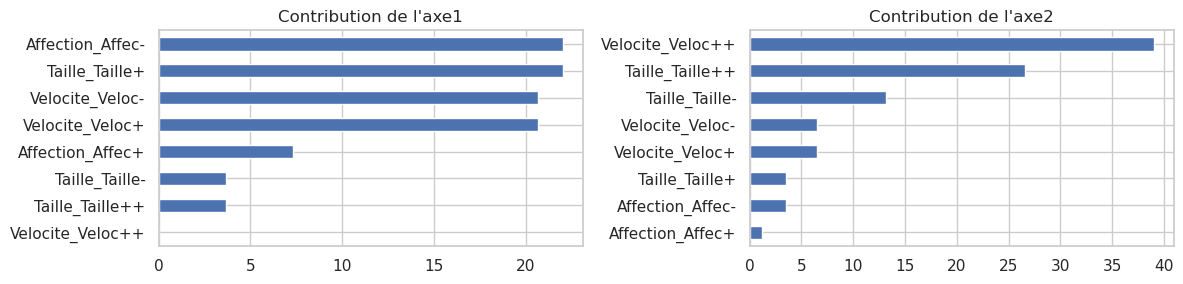

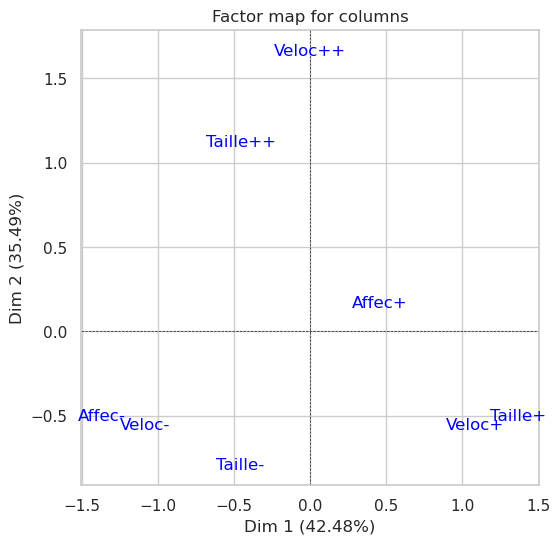

In [378]:
# Mapping des points colonnes

i = 1

### adapter le paramètre si la figure 
# est trop petite ou trop grande
param = 10

dfc = acm.col_topandas()


while i < 2:    
    c1 = 'col_contrib_dim' + str(i)  
    c2 = 'col_contrib_dim' + str(1+i)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

    r1 = dfc[c1].sort_values(ascending=True)[:10]
    r1.plot(kind='barh', ax=axes[0], title="Contribution de l'axe"+ str(i))

    r2 = dfc[c2].sort_values(ascending=True)[:10]
    r2.plot(kind='barh', ax=axes[1], title="Contribution de l'axe"+ str(i+1))

    plt.tight_layout()
    plt.show()

    w = eig.iloc[:,1][:i].values[0]*param
    h = eig.iloc[:,1][:(i+1)].values[0]*param
    
    acm.mapping_col(num_x_axis=i, num_y_axis=i+1, figsize=(w,h))
    plt.show()
    i +=1

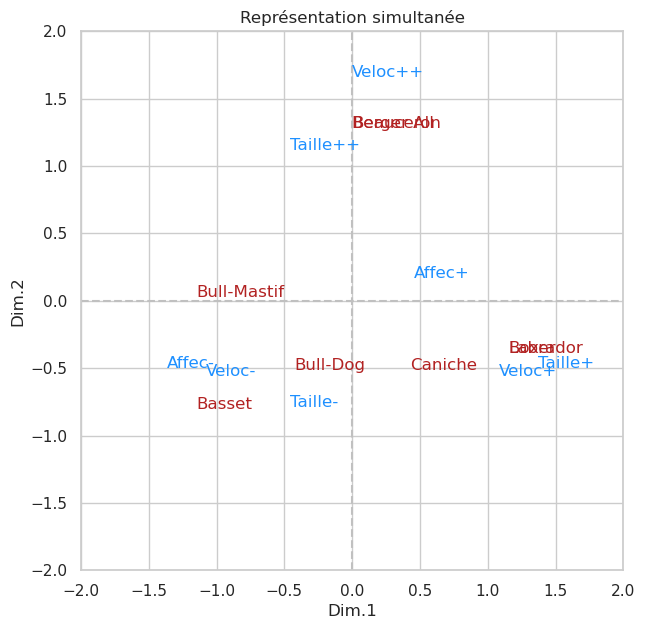

In [379]:
#représentation simultanée - relation quasi-barycentrique
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation simultanée")
for i in range(df.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],df.columns[i],color='dodgerblue')
for i in range(df.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],df.index[i],color='firebrick')
plt.show()

<h5>Export de la totalité des données lignes vers une DataFrame pandas</h5>
<p>On peut envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points <b>colonnes</b>, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).</p>

In [361]:
df_rows = acm.row_topandas()
print(df_rows[:3])

            row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
Beauceron     7.926887e-16        1.279924        0.153220   -1.865946e-16   
Basset       -1.150779e+00       -0.799057       -0.023258   -9.507874e-02   
Berger All    1.126097e-16        1.279924        0.153220   -2.815471e-17   

            row_coord_dim5  row_contrib_dim1  row_contrib_dim2  \
Beauceron         0.070598      1.109336e-29         34.620365   
Basset            0.372484      2.337985e+01         13.493329   
Berger All        0.070598      2.238769e-31         34.620365   

            row_contrib_dim3  row_contrib_dim4  row_contrib_dim5  \
Beauceron           1.120088      6.240013e-30          1.759547   
Basset              0.025809      1.620147e+00         48.980862   
Berger All          1.120088      1.420658e-31          1.759547   

            row_cos2_dim1  row_cos2_dim2  row_cos2_dim3  row_cos2_dim4  \
Beauceron    3.770133e-31       0.982924       0.014086   2.089052e-32   
B

In [398]:
### Filtrer les individus
# Cosinus = qualité de représentation des points lignes
rc1 = df_rows.row_cos2_dim1.sort_values(ascending=False)[:1].index
print(rc1)
rc2 = df_rows.row_cos2_dim2.sort_values(ascending=False)[:1].index
print(rc2)
lrc = list(set(list(rc1) + list(rc2)))
lrc

Index(['Boxer'], dtype='object')
Index(['Beauceron'], dtype='object')


['Beauceron', 'Boxer']

In [399]:
### Les individus les mieux représentés sur les deux premiers axes
df.loc[lrc]

,Taille+,Taille++,Taille-,Veloc+,Veloc++,Veloc-,Affec+,Affec-
Chien,,,,,,,,
Beauceron,0,1,0,0,1,0,1,0
Boxer,1,0,0,1,0,0,1,0


In [400]:
acm.row_coord_

array([[ 7.92688748e-16,  1.27992431e+00,  1.53219810e-01,
        -1.86594575e-16,  7.05983054e-02],
       [-1.15077946e+00, -7.99057464e-01, -2.32583217e-02,
        -9.50787378e-02,  3.72483553e-01],
       [ 1.12609714e-16,  1.27992431e+00,  1.53219810e-01,
        -2.81547122e-17,  7.05983054e-02],
       [ 1.15077946e+00, -3.85124469e-01, -4.28076342e-01,
         9.50787378e-02,  4.19895430e-02],
       [-4.28413700e-01, -5.09675370e-01,  7.02932874e-01,
         5.10789728e-01, -1.54577391e-01],
       [-1.15077946e+00,  2.88085250e-02, -8.32894362e-01,
        -9.50787378e-02, -2.88504467e-01],
       [ 4.28413700e-01, -5.09675370e-01,  7.02932874e-01,
        -5.10789728e-01, -1.54577391e-01],
       [ 1.15077946e+00, -3.85124469e-01, -4.28076342e-01,
         9.50787378e-02,  4.19895430e-02]])

In [401]:
idl = [df.index.get_loc(e) for e in lrc]
idl

[0, 3]

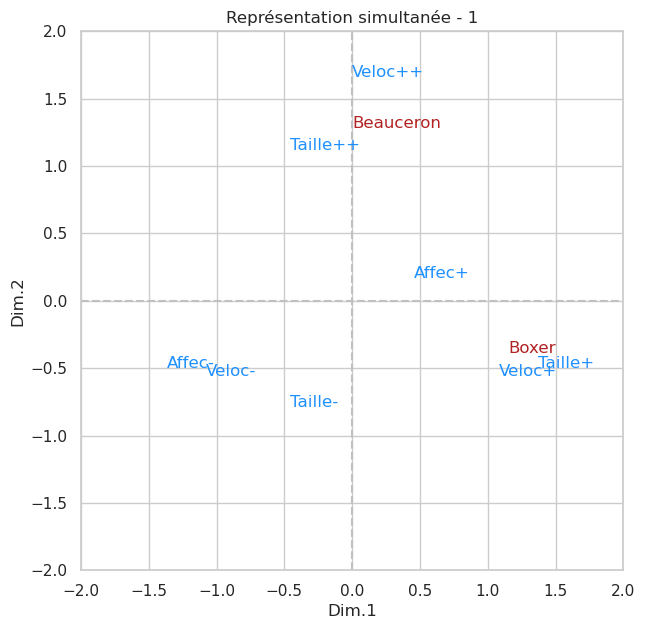

In [402]:
#représentation simultanée - relation quasi-barycentrique
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation simultanée - 1")
for i in range(df.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],df.columns[i],color='dodgerblue')
for i in idl:
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],df.index[i],color='firebrick')
plt.show()

<h5>Export de la totalité des données colonnes vers une DataFrame pandas</h5>
<p>On peut envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points <b>colonnes</b>, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).</p>

In [376]:
df_cols = acm.col_topandas()
print(df_cols[:3])

                 col_coord_dim1  col_coord_dim2  col_coord_dim3  \
Taille_Taille+         1.367621       -0.500758       -0.836329   
Taille_Taille++       -0.455874        1.121966       -0.342844   
Taille_Taille-        -0.455874       -0.788128        0.900396   

                 col_coord_dim4  col_coord_dim5  col_contrib_dim1  \
Taille_Taille+         0.360016        0.223148         22.013956   
Taille_Taille++       -0.120005       -0.260949          3.668993   
Taille_Taille-        -0.120005        0.112184          3.668993   

                 col_contrib_dim2  col_contrib_dim3  col_contrib_dim4  \
Taille_Taille+           3.532865         22.247732         15.486044   
Taille_Taille++         26.602515          5.608079          2.581007   
Taille_Taille-          13.126725         38.680298          2.581007   

                 col_contrib_dim5  col_cos2_dim1  col_cos2_dim2  \
Taille_Taille+          11.719402       0.623463       0.083586   
Taille_Taille++         24.

<h3>I.4. Graphiques</h3>

<p>
2 types de graphiques peuvent être réalisés :
<ul>
    <li>Les mapping classiques qui représentent les points lignes et colonnes sur un plan factoriel</li>
    <li>Des graphiques qui permettent d'interpréter rapidement les axes : on choisit un axe factoriel (le 1er axe dans notre exemple) et on observe quels sont les points lignes et colonnes qui présentent les plus fortes contributions et cos2 pour cet axe</li>
</ul>
</p>
<h5>Graphiques factoriels</h5>

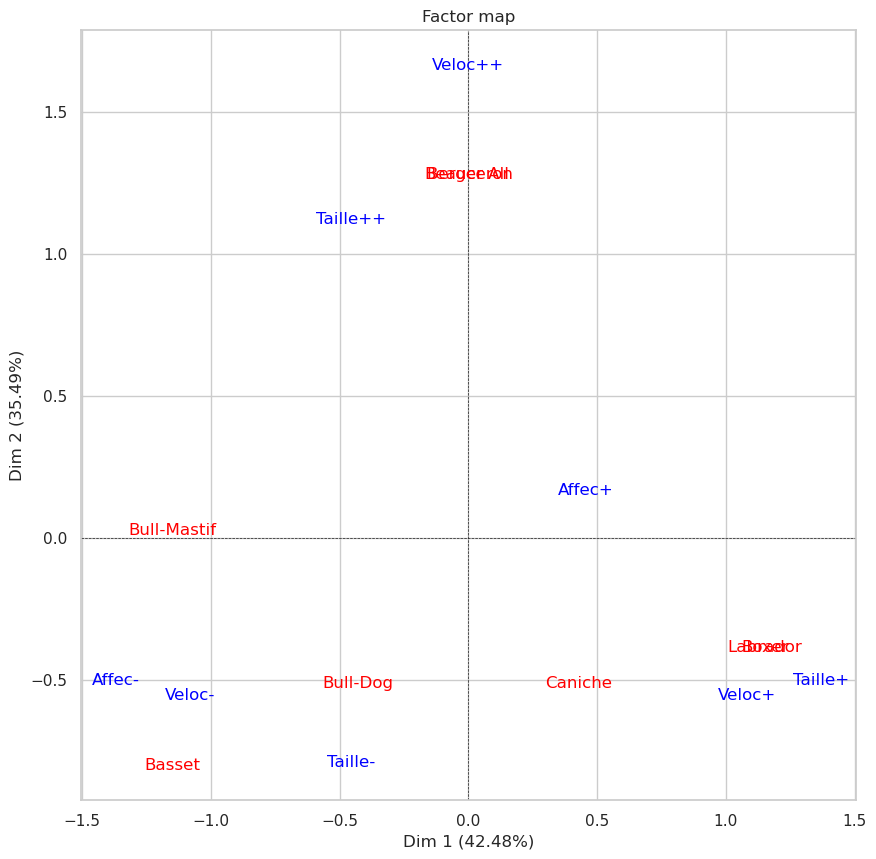

In [320]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
acm.mapping(num_x_axis=1, num_y_axis=2, figsize=(10,10))

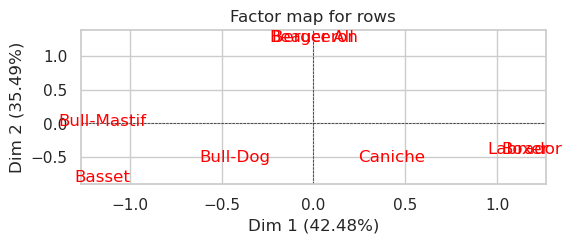

In [321]:
# Mapping des points lignes
acm.mapping_row(num_x_axis=1, num_y_axis=2)

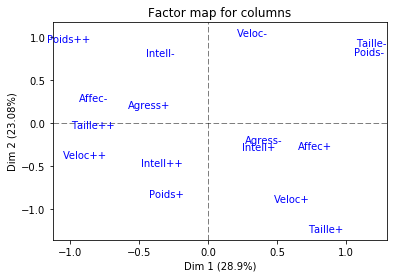

In [23]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2)

Sur les 3 graphiques factoriels précédents, les catégories ne sont pas préfixées par les noms des variables auxquelles elles appartiennent (c'est le choix fait par défaut par le package).<br />
Ce choix est pertinent dans cet exemple car l'omission des préfixes permet d'alléger les graphiques, et il n'y a pas de risque de confusion entre les catégories.<br />
Mais quand l'ensemble des catégories présente des doublons, il est préférable de les préfixer par les noms de variables pour lever toute ambiguïté, ce qui alourdit la présentation.<br />
Dans ce cas, on fixe le paramètre <i>short_labels</i> à <i>False</i>

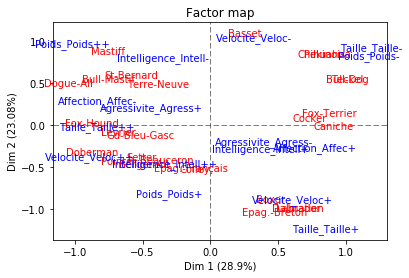

In [24]:
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)